In [33]:
import numpy as np
import pandas as pd
import seaborn as sns # pyright: ignore[reportMissingModuleSource]
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('exams.csv')

In [35]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [36]:
df.shape

(1000, 8)

In [37]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(1)

In [39]:
#we techinically have to delete the duplicates

In [40]:
print(df[df.duplicated()])

    gender race/ethnicity parental level of education     lunch  \
825   male        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100  


In [41]:
df = df.drop_duplicates()

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [44]:
#exploring the data

In [45]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [46]:
print("Categories in gender variable: ", end=" ")
print(df['gender'].unique())

print("Categories in race variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in gender variable:  ['male' 'female']
Categories in race variable:  ['group A' 'group D' 'group E' 'group B' 'group C']
Categories in parental level of education variable:  ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['completed' 'none']


In [47]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [48]:
numeric_features

['math score', 'reading score', 'writing score']

In [49]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [50]:
#adding columns for total score and average score

In [51]:
df['total_score'] = df['math score'] + df['reading score']+df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group A,high school,standard,completed,67,67,63,197,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,169,56.333333
3,male,group B,high school,standard,none,77,78,68,223,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,219,73.000000


In [52]:
max_math_score = df['math score'].max()

# Find the highest reading score in the dataset
max_reading_score = df['reading score'].max()

max_writing_score = df['writing score'].max()

# Find the highest total score in the dataset
max_total_score = df['total_score'].max()

# --- Step 2: Count the number of students with the max score in each category ---
# Count students with the maximum math score
students_with_max_math = len(df[df['math score'] == max_math_score])

# Count students with the maximum reading score
students_with_max_reading = len(df[df['reading score'] == max_reading_score])

students_with_max_writing = len(df[df['writing score'] == max_writing_score])
# Count students with the maximum total score
students_with_max_total = len(df[df['total_score'] == max_total_score])

# --- Step 3: Print the results ---
print(f"Maximum Scores:")
print(f"  Max Math Score: {max_math_score}")
print(f"  Max Reading Score: {max_reading_score}")
print(f" Max writing Score: {max_writing_score}")
print(f"  Max Total Score: {max_total_score}")
print("\nNumber of Students with Maximum Scores:")
print(f"  Students with max math score: {students_with_max_math}")
print(f"  Students with max reading score: {students_with_max_reading}")
print(f"  Students with max writing score: {students_with_max_writing}")

print(f"  Students with max total score: {students_with_max_total}")

# You can also print the rows of the students who achieved the max scores
print("\nDetails of students with max math score:")
print(df[df['math score'] == max_math_score])

print("\nDetails of students with max reading score:")
print(df[df['reading score'] == max_reading_score])

print("\nDetails of students with max writing score:")
print(df[df['writing score'] == max_writing_score])

print("\nDetails of students with max total score:")
print(df[df['total_score'] == max_total_score])

Maximum Scores:
  Max Math Score: 100
  Max Reading Score: 100
 Max writing Score: 100
  Max Total Score: 300

Number of Students with Maximum Scores:
  Students with max math score: 13
  Students with max reading score: 18
  Students with max writing score: 17
  Students with max total score: 4

Details of students with max math score:
     gender race/ethnicity parental level of education     lunch  \
44     male        group E                 high school  standard   
128    male        group E                some college  standard   
148  female        group E           bachelor's degree  standard   
235    male        group C          associate's degree  standard   
281    male        group E          associate's degree  standard   
550  female        group E                some college  standard   
584    male        group C           bachelor's degree  standard   
593    male        group D           bachelor's degree  standard   
634  female        group D             master's d

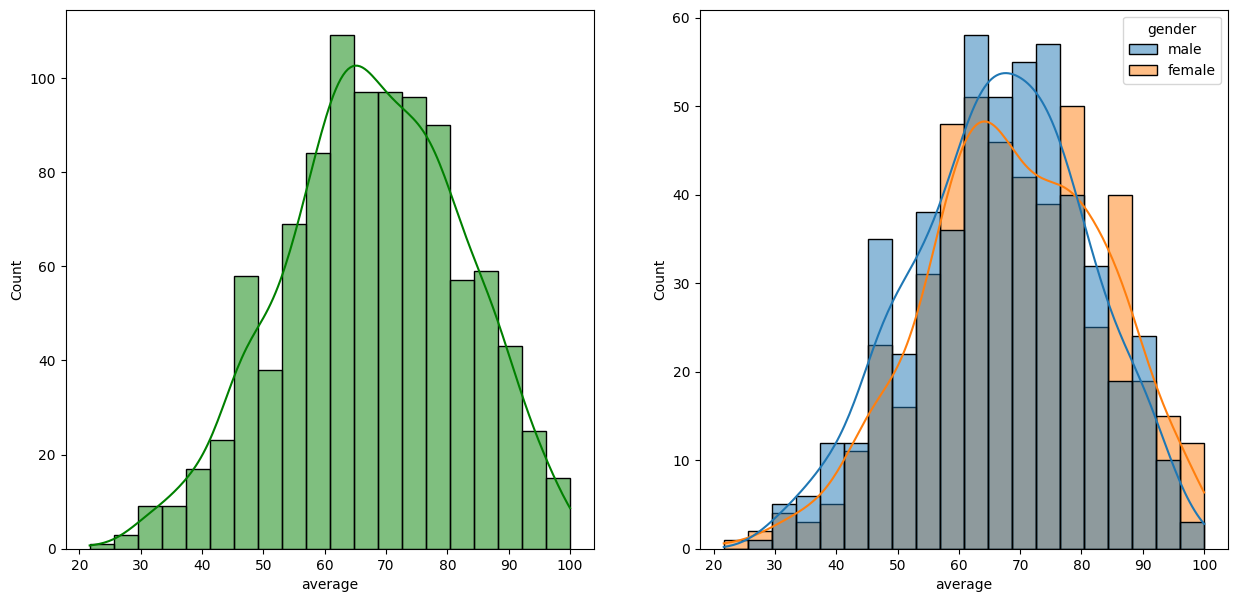

In [53]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins = 20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True,hue='gender')
plt.show()

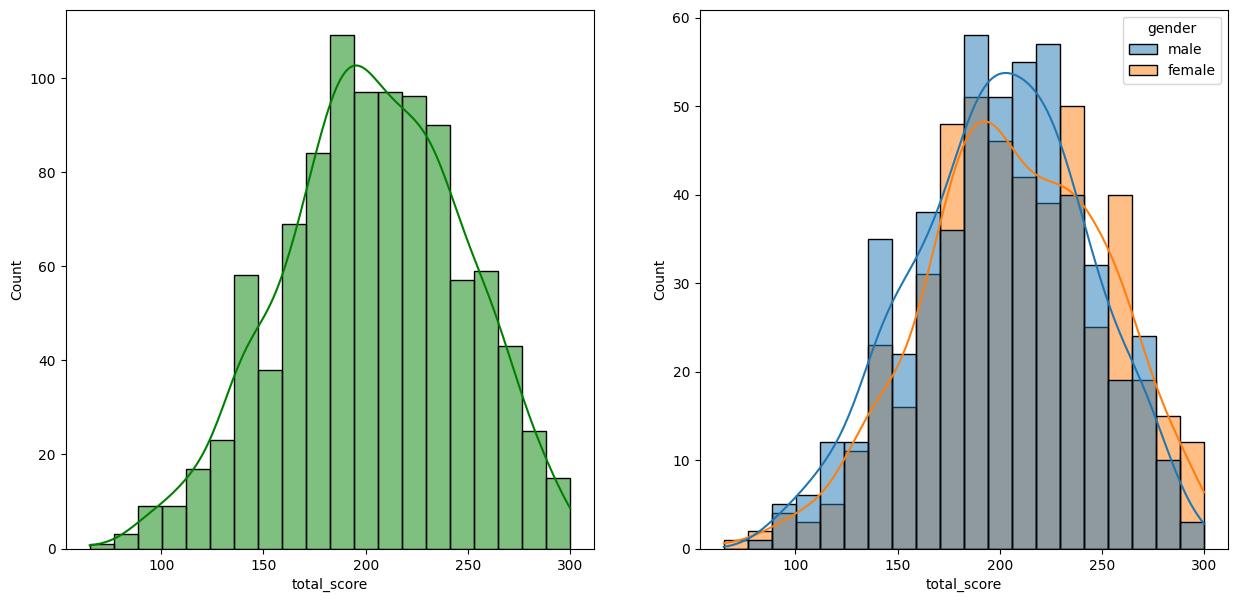

In [54]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'total_score', bins = 20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score',kde=True,hue='gender')
plt.show()

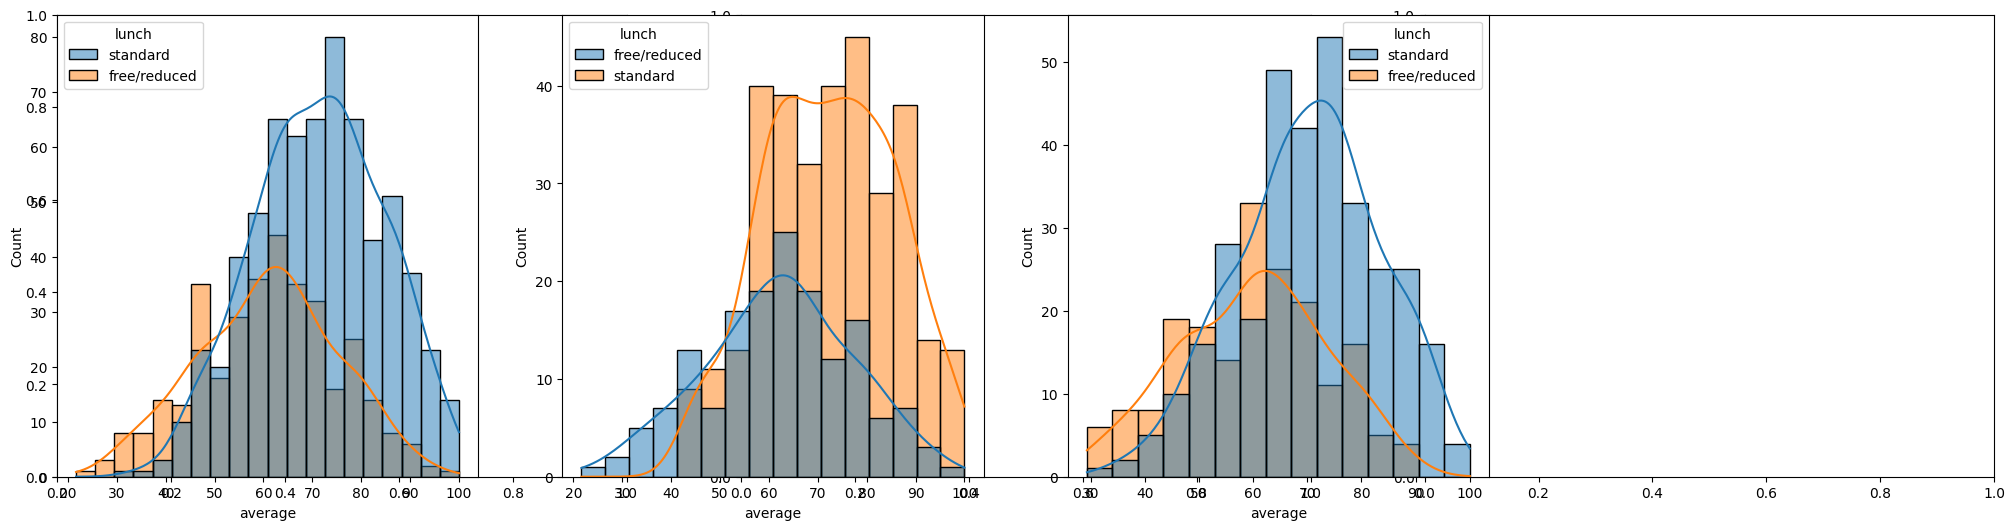

In [55]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

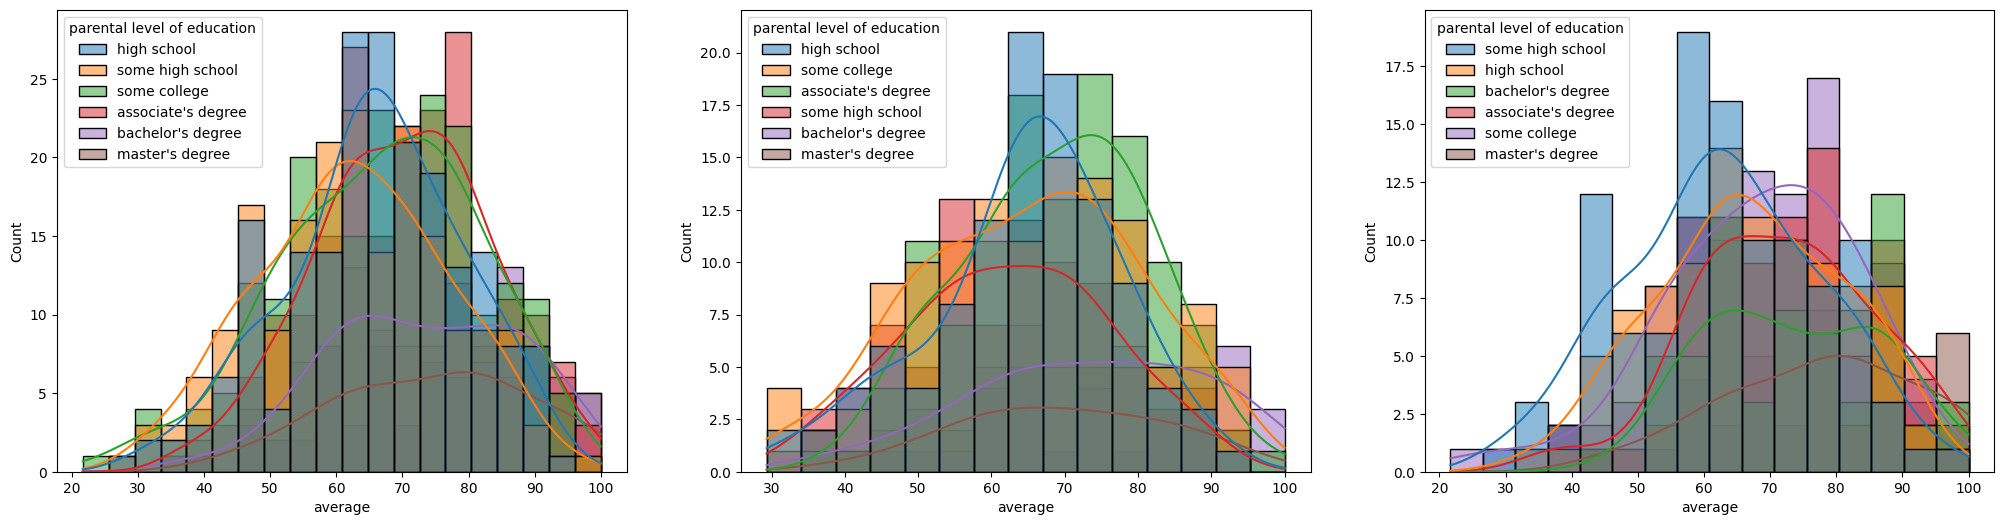

In [58]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

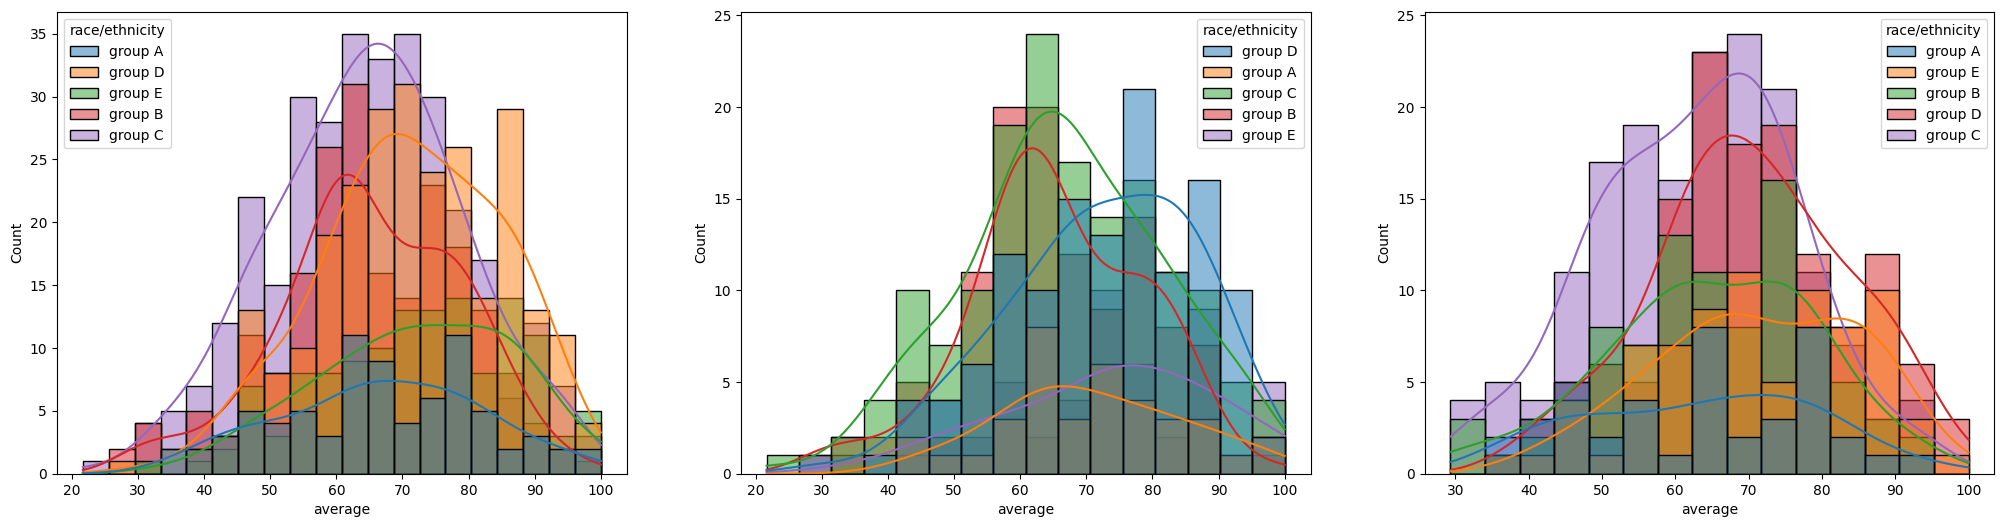

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

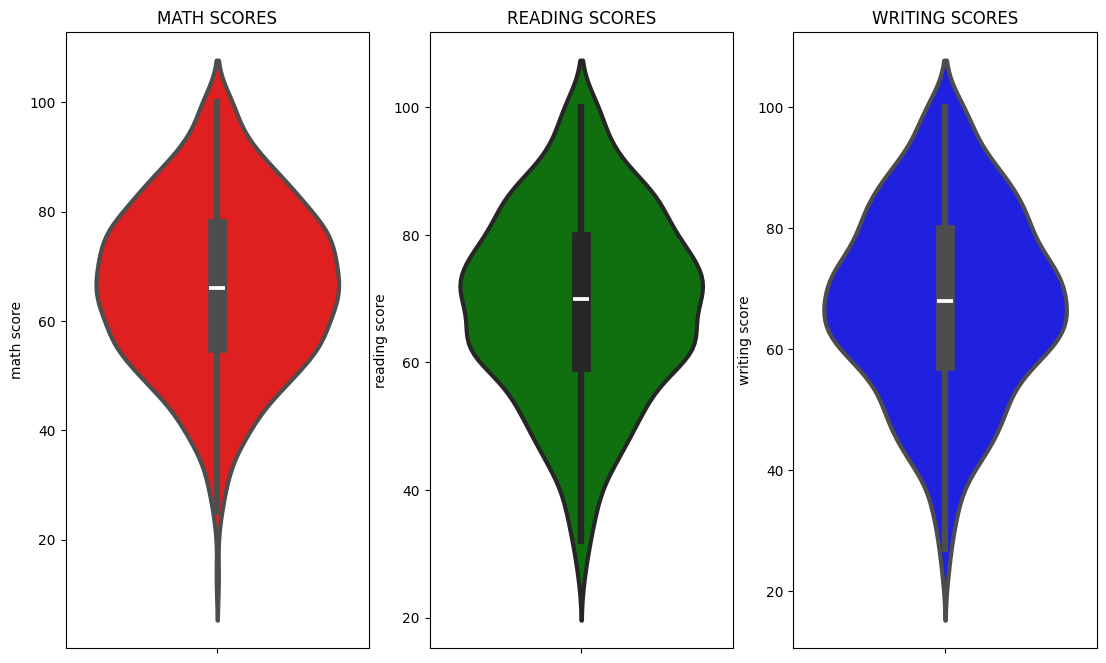

In [61]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

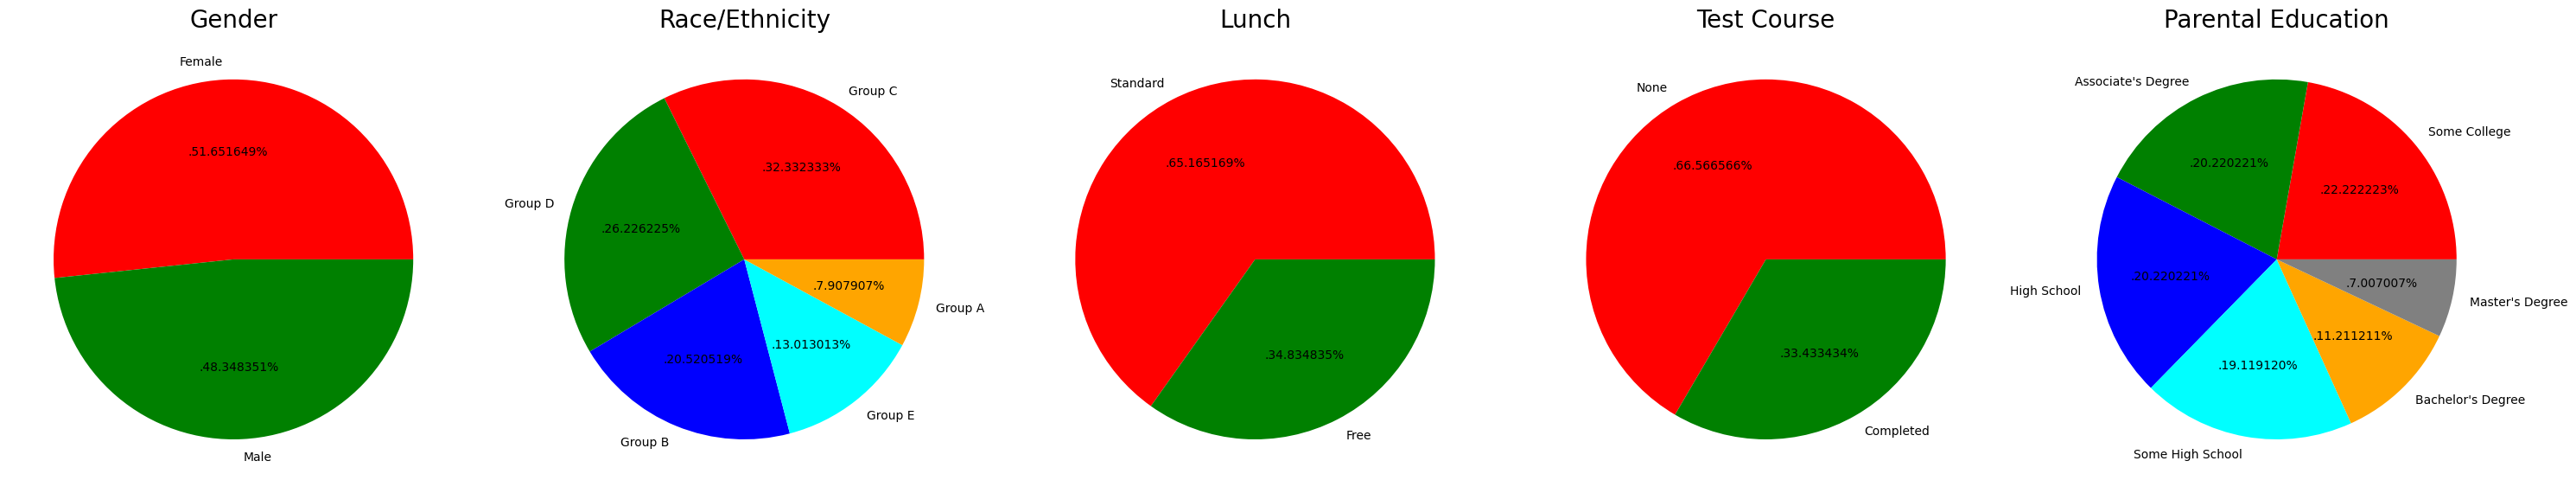

In [62]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

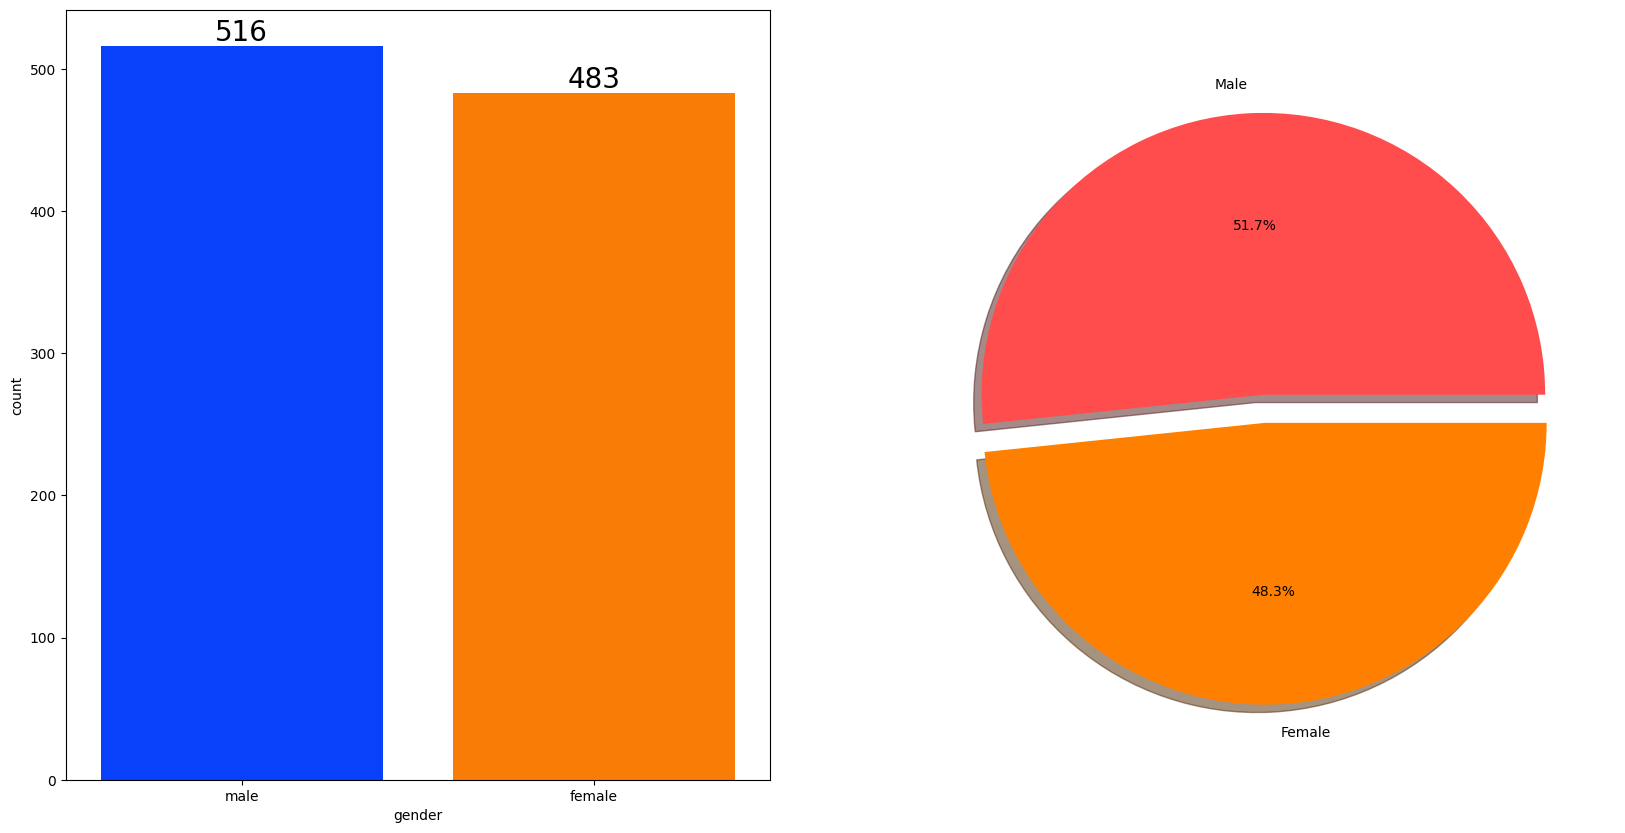

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [70]:
# This will calculate the mean for all numeric columns in df
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.196687,71.888199,71.708075,206.792961,68.930987
male,69.325581,66.240310,63.959302,199.525194,66.508398


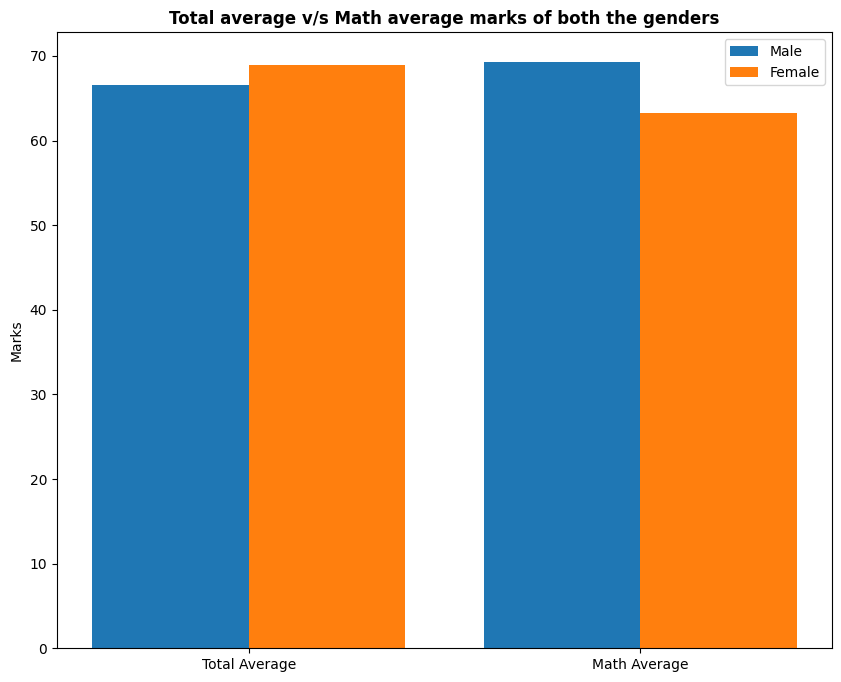

In [71]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

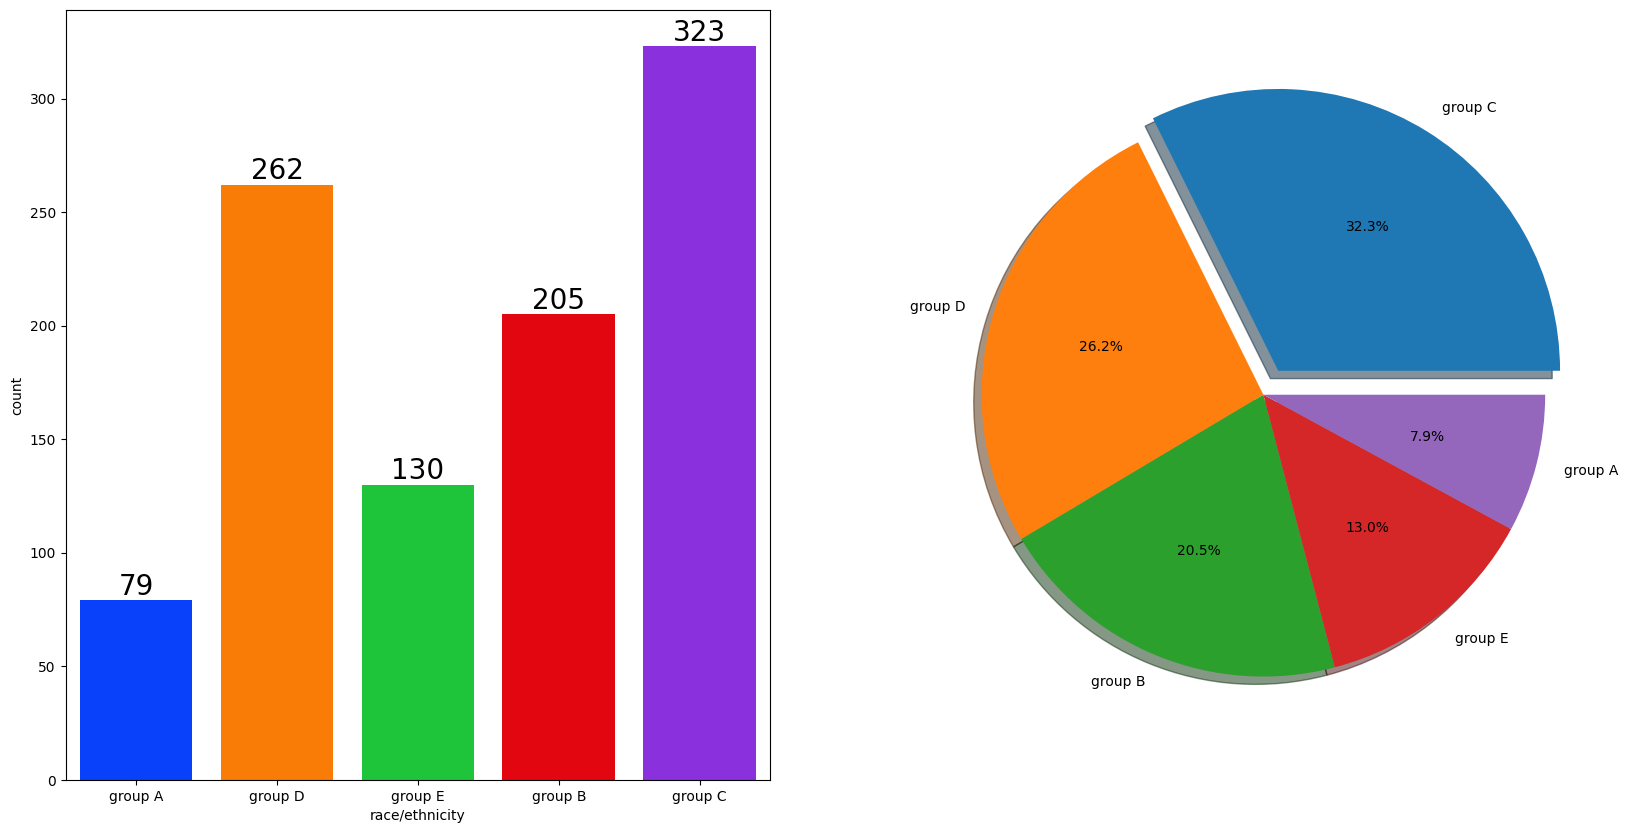

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

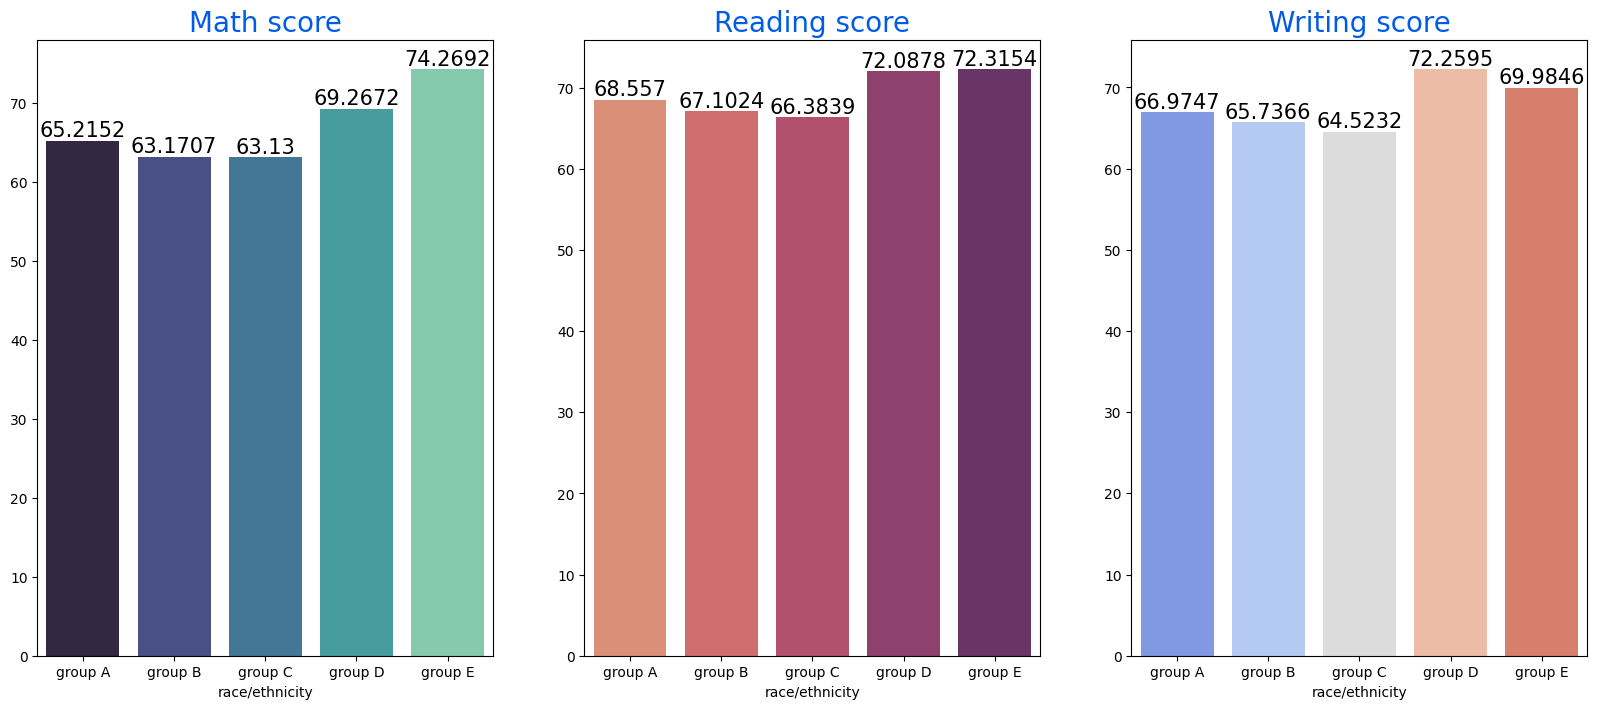

In [76]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

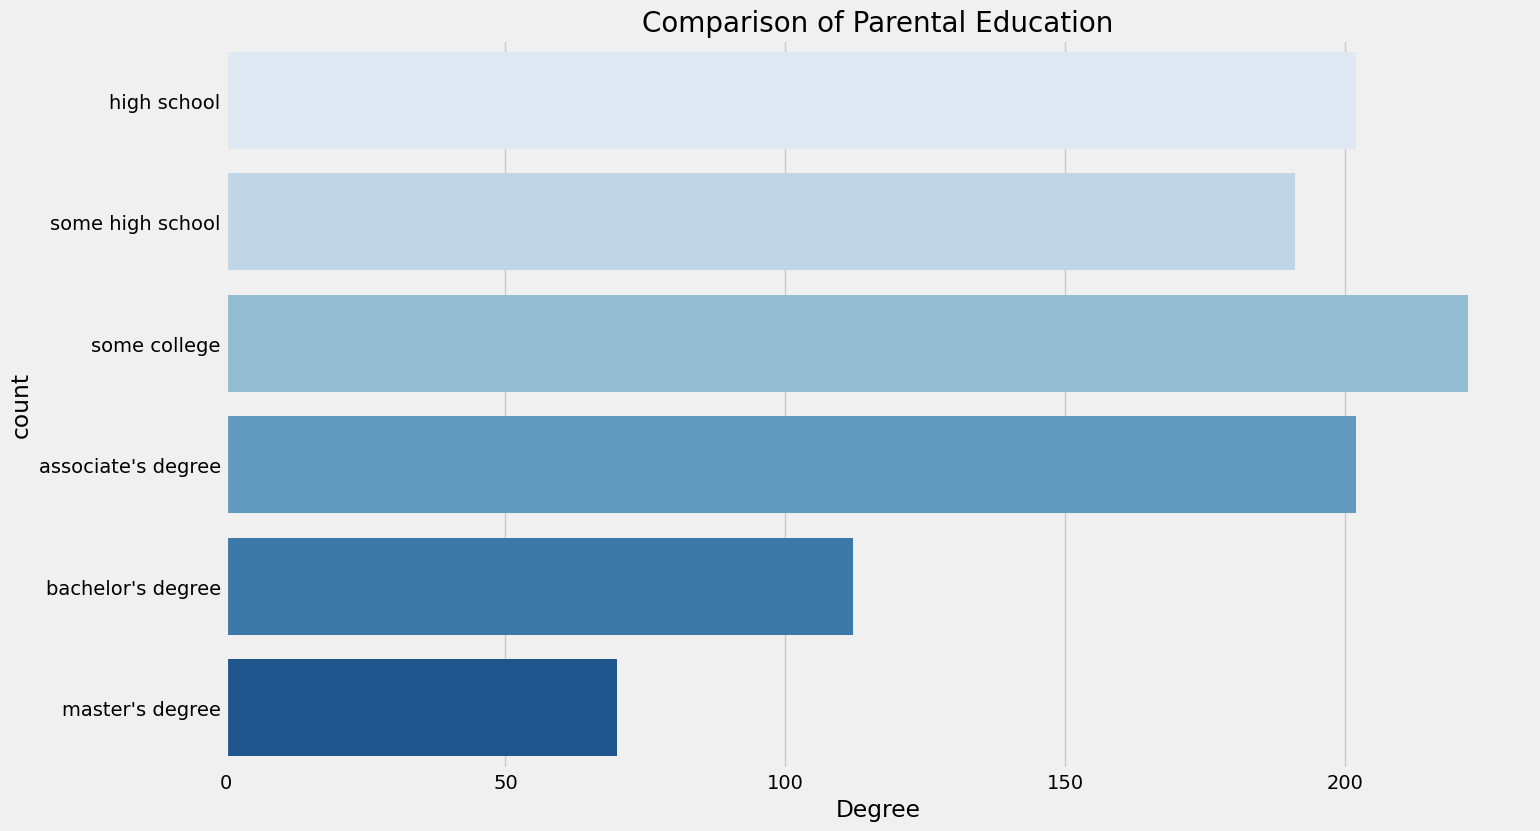

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues') # type: ignore
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

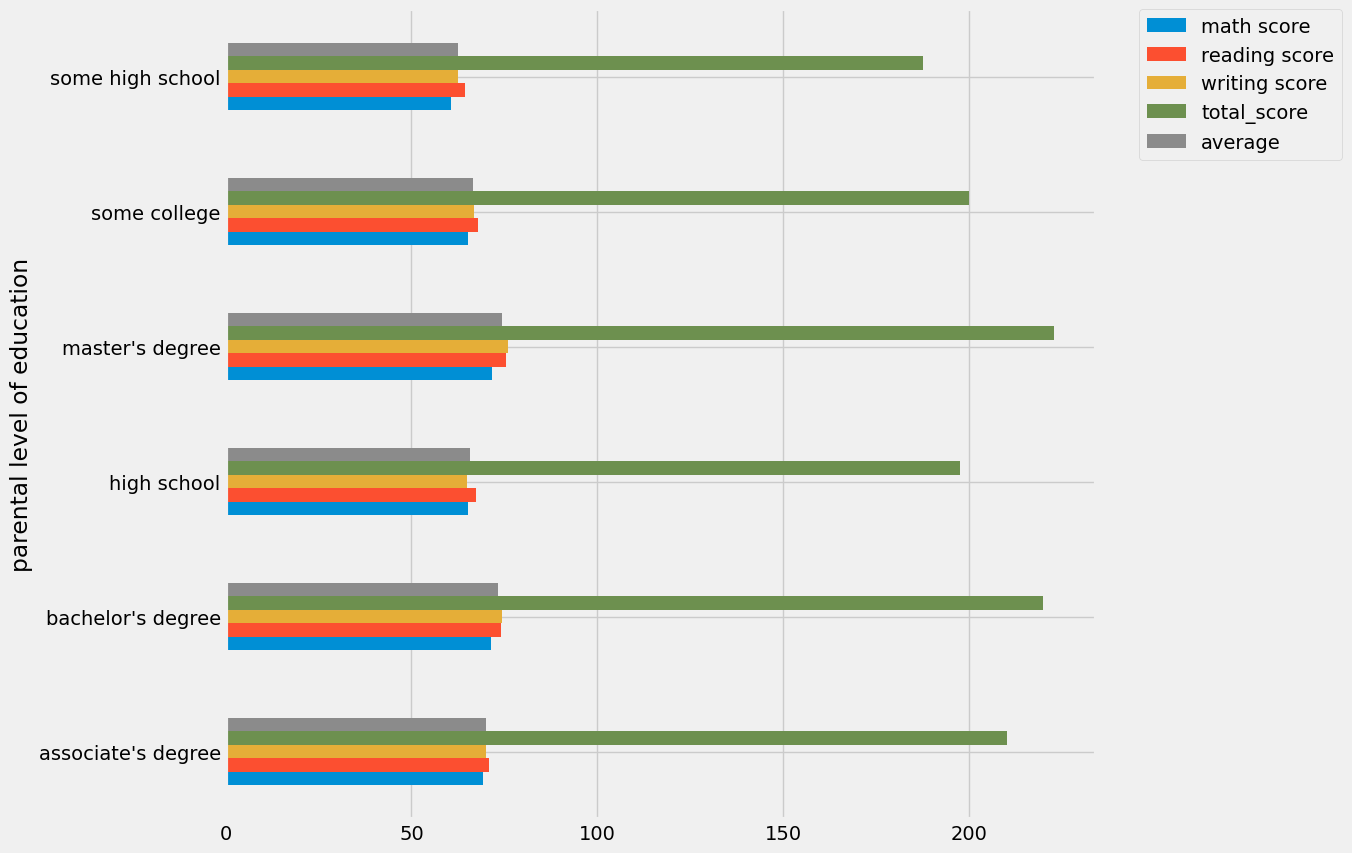

In [79]:

df.groupby('parental level of education').agg('mean', numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

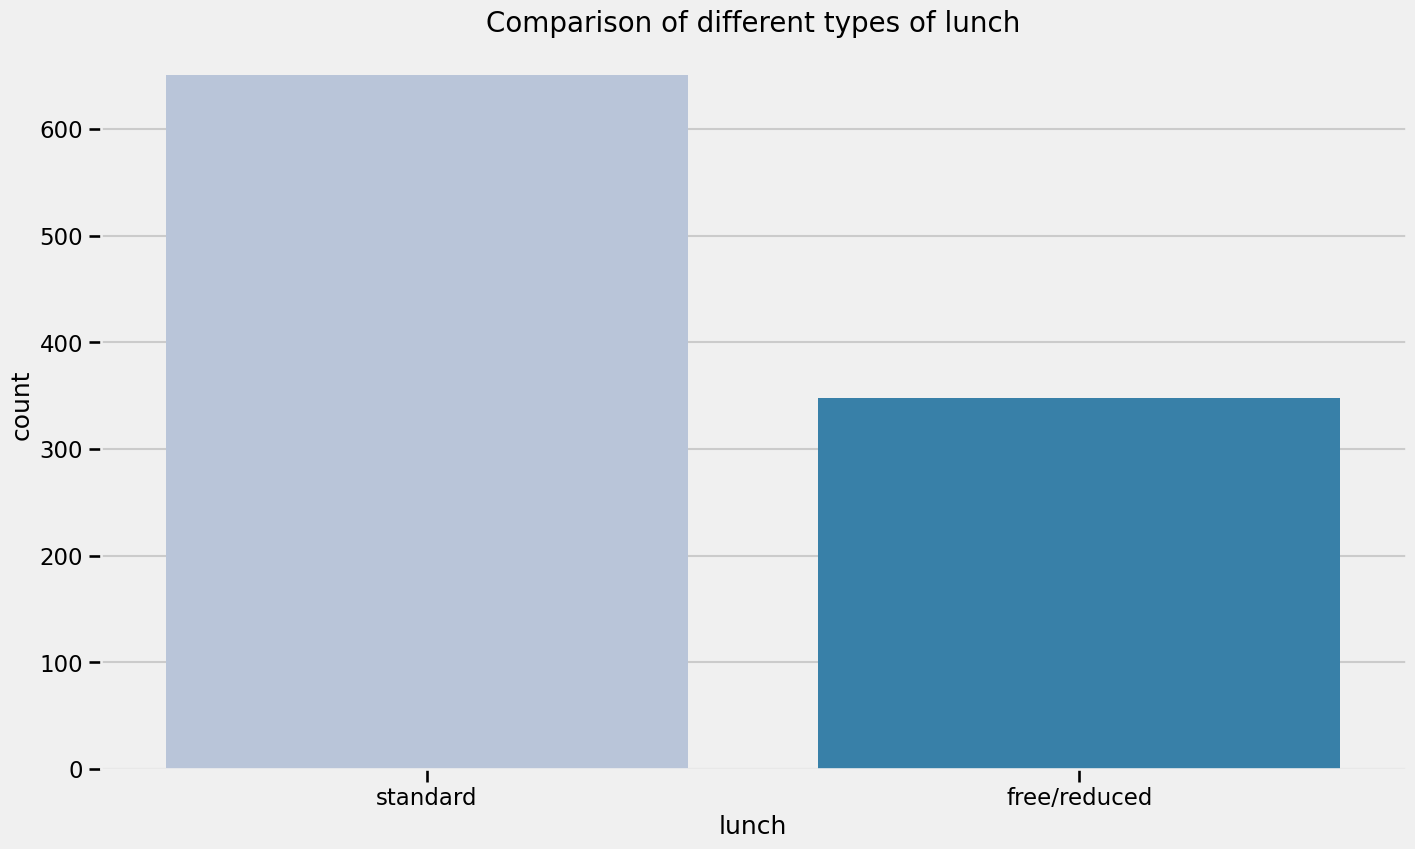

In [82]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_context('talk')  # Set the 'talk' context for larger font sizes
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.show()


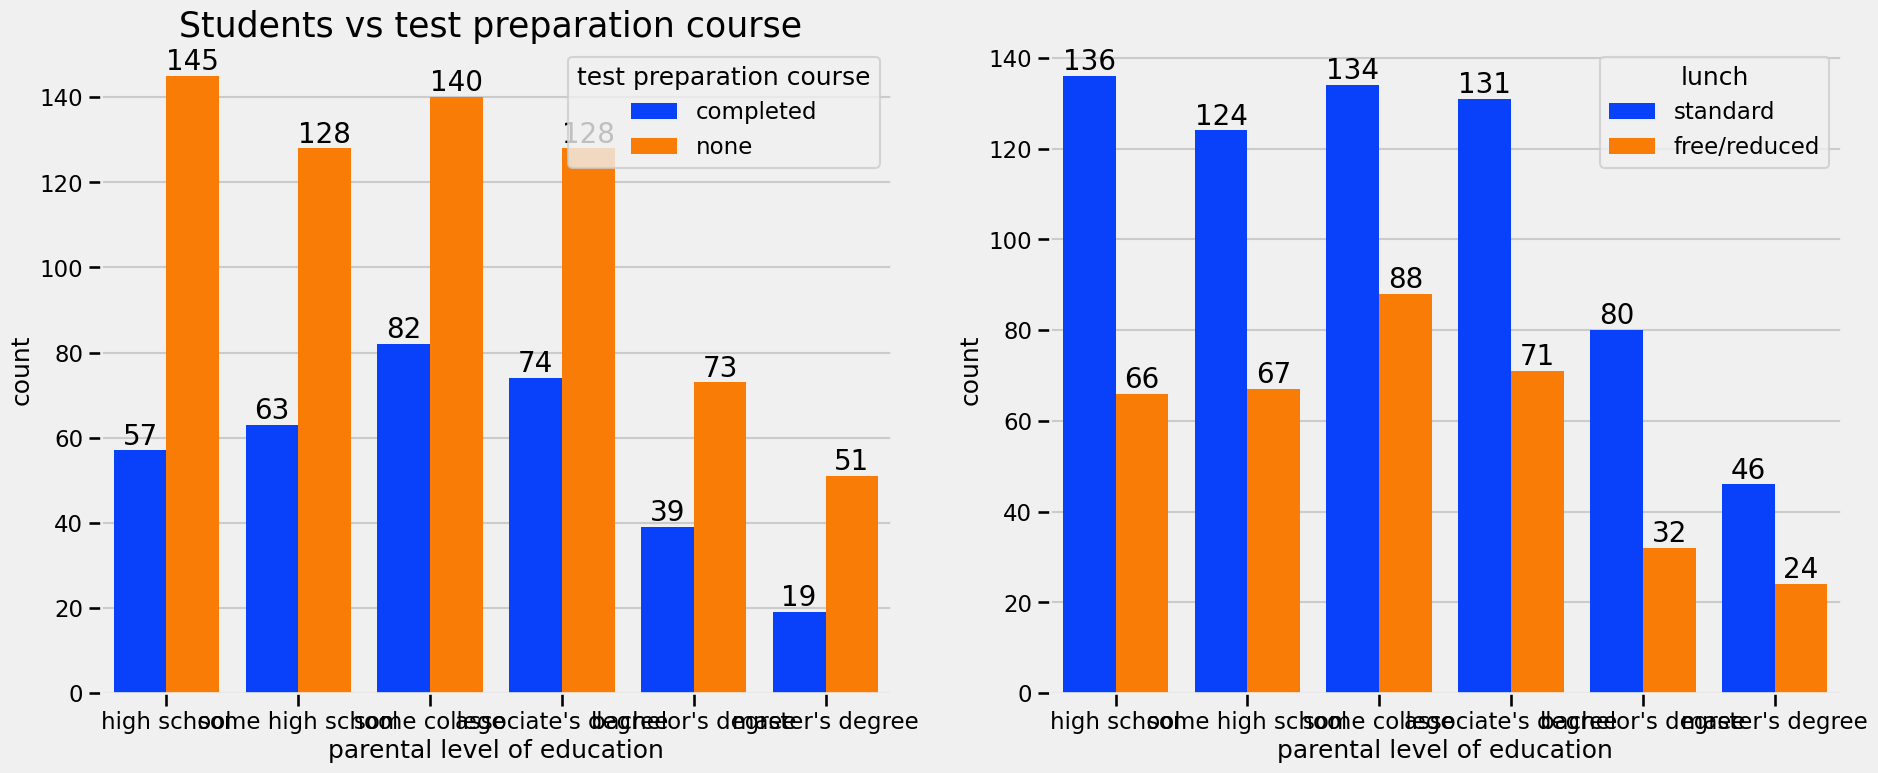

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing score'>

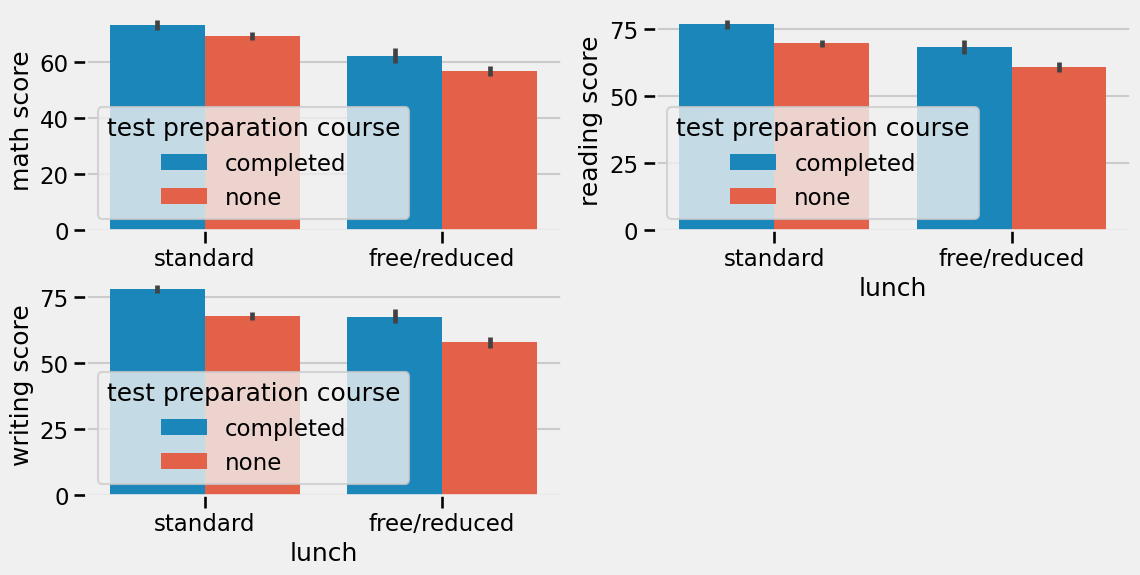

In [84]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

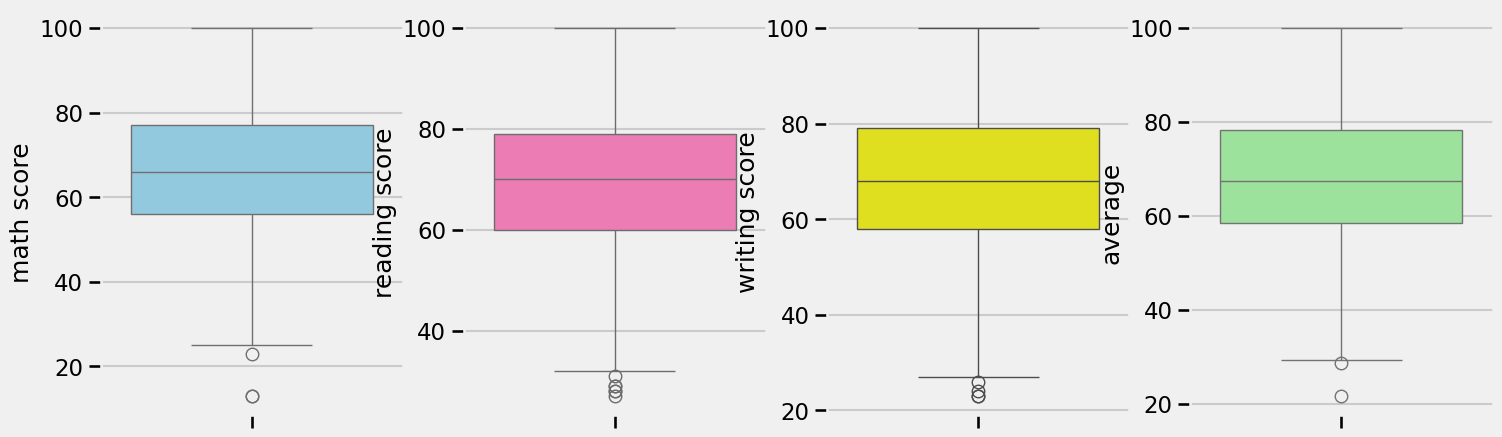

In [85]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

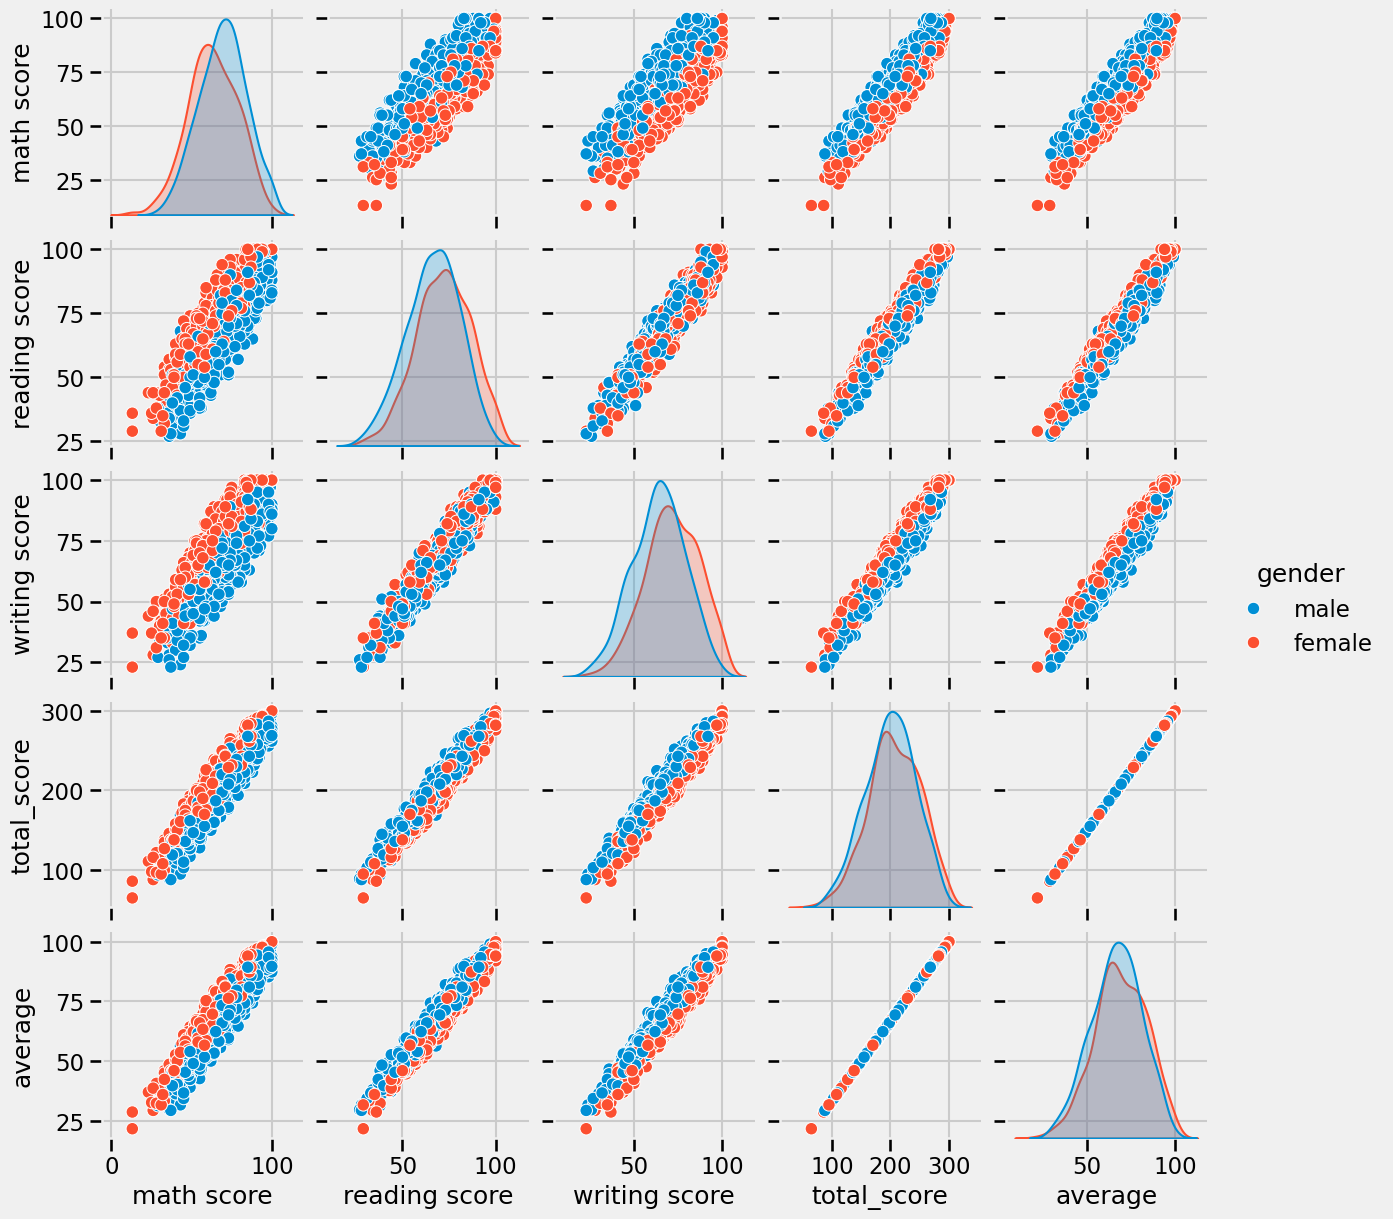

In [86]:
sns.pairplot(df,hue = 'gender')
plt.show()